In [25]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u382-ga-1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [26]:
from pyspark import SparkContext, SparkConf

In [27]:
from pyspark.rdd import RDD

In [28]:
filePath = 'FL_insurance_sample.csv'

An RDD(Resilient Distributed Dataset) consists of a collection of elements partitioned accross the nodes of a cluster of machines that can be operated on in parallel. In Spark, work is expressed by the creation and transformation of RDDs using Spark operators.

In [30]:
##Generate a RDD from a Python array with the parallelize method.

import pyspark
sc = pyspark.SparkContext(appName="intro_to_spark")

log_of_songs = [
        "Despacito",
        "Nice for what",
        "No tears left to cry",
        "Despacito",
        "Havana",
        "In my feelings",
        "Nice for what",
        "despacito",
        "All the stars"
]

# parallelize the log_of_songs to use with Spark
distributed_song_log = sc.parallelize(log_of_songs)

In [31]:
def convert_song_to_lowercase(song):
    return song.lower()

In [32]:
distributed_song_log.map(convert_song_to_lowercase)

PythonRDD[1] at RDD at PythonRDD.scala:53

##PySpark map (map()) is an RDD transformation that is used to apply the transformation function (lambda) on every element of RDD/DataFrame and returns a new RDD.

In [33]:
distributed_song_log.map(convert_song_to_lowercase).collect()

['despacito',
 'nice for what',
 'no tears left to cry',
 'despacito',
 'havana',
 'in my feelings',
 'nice for what',
 'despacito',
 'all the stars']

In [34]:
distributed_song_log.collect()

['Despacito',
 'Nice for what',
 'No tears left to cry',
 'Despacito',
 'Havana',
 'In my feelings',
 'Nice for what',
 'despacito',
 'All the stars']

In [35]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [36]:
spark = SparkSession \
    .builder \
    .appName("intro_to_spark") \
    .getOrCreate()

In [37]:
spark.sparkContext.getConf().getAll()

[('spark.master', 'local'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', 'b1632326daba'),
 ('spark.app.id', 'local-1697141513233'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.a

In [ ]:
0


Mounted at /content/drive


IndexError: ignored

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
path = "sparkify_log_small.json"
user_log = spark.read.json(path)

In [43]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [44]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [45]:
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [46]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [47]:
out_path = ".//sparkify_log_small.csv"
user_log.write.save(out_path, format="csv", header=True)

In [48]:
user_log_2 = spark.read.csv(out_path, header=True)

In [49]:
user_log_2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [50]:
user_log_2.select("userID").show()

+------+
|userID|
+------+
|  1046|
|  1000|
|  2219|
|  2373|
|  1747|
|  1747|
|  1162|
|  1061|
|   748|
|   597|
|  1806|
|   748|
|  1176|
|  2164|
|  2146|
|  2219|
|  1176|
|  2904|
|   597|
|   226|
+------+
only showing top 20 rows



In [51]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
path = "sparkify_log_small.json"
user_log = spark.read.json(path)

In [54]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [55]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [56]:
user_log.describe("sessionId").show()

+-------+------------------+
|summary|         sessionId|
+-------+------------------+
|  count|             10000|
|   mean|         4436.7511|
| stddev|2043.1281541827557|
|    min|                 9|
|    max|              7144|
+-------+------------------+



In [57]:
user_log.count()

10000

In [ ]:
user_log.select("page").dropDuplicates().sort("page").show()

In [58]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [59]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [ ]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

In [60]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0). hour)

In [61]:
user_log = user_log.withColumn("hour", get_hour(user_log.ts))

In [62]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22')

In [63]:
songs_in_hour = user_log.filter(user_log.page == "NextSong").groupby(user_log.hour).count().orderBy(user_log.hour.cast("float"))
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



Text(0, 0.5, 'Songs played')

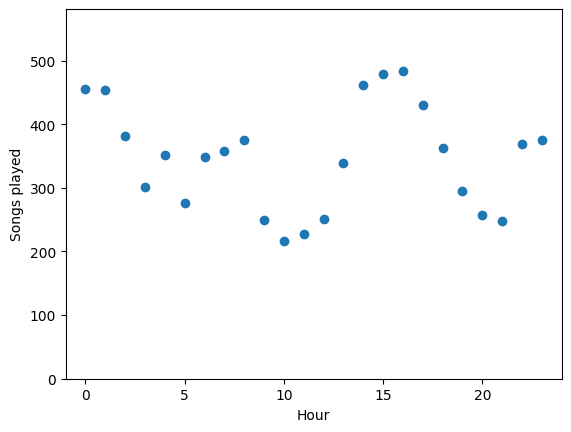

In [64]:
songs_in_hour_pd = songs_in_hour.toPandas()
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

plt.scatter(songs_in_hour_pd["hour"], songs_in_hour_pd["count"])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played")

In [ ]:
Drop Rows with missing values

In [65]:
user_log_valid = user_log.dropna(how = "any", subset = ["userId", "sessionId"])

In [66]:
user_log.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [67]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [68]:
user_log_valid.count()

9664

In [69]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  NULL|Logged In|    Kelly|     F|           24|  Newton|  NULL| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|NULL|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  11|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [70]:
user_log.select(["userId", "firstname", "page", "level", "song"]).where(user_log.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [71]:
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [72]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [73]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0)

In [74]:
from pyspark.sql import Window

In [75]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [76]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [77]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level", "phase"]).where(user_log.userId == "1138").sort("ts").collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs

In [81]:
spark = SparkSession \
    .builder \
    .appName("intro_to_spark") \
    .getOrCreate()

In [82]:
spark

In [83]:
sc = spark.sparkContext
sc

<SparkContext master=local appName=intro_to_spark>

In [84]:
sqlContext = SQLContext(spark.sparkContext)
sqlContext

NameError: ignored

In [91]:
from sklearn.datasets import fetch_california_housing

HOUSING_DATA = 'housing.csv'

In [88]:
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [92]:
# define the schema, corresponding to a line in the csv data file.
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [93]:
# Load housing data
housing_df = spark.read.csv(path=HOUSING_DATA, schema=schema).cache()

In [94]:
housing_df.columns

['long',
 'lat',
 'medage',
 'totrooms',
 'totbdrms',
 'pop',
 'houshlds',
 'medinc',
 'medhv']

In [95]:
housing_df.printSchema()

root
 |-- long: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- medage: float (nullable = true)
 |-- totrooms: float (nullable = true)
 |-- totbdrms: float (nullable = true)
 |-- pop: float (nullable = true)
 |-- houshlds: float (nullable = true)
 |-- medinc: float (nullable = true)
 |-- medhv: float (nullable = true)



In [96]:
##Transforming RDD's

num = [1,2,3,4,5]

num_rdd = sc.parallelize(num)
num_rdd.collect()

[1, 2, 3, 4, 5]

# Transformations
* Transformations are lazy in nature and will not be executed until an Action is executed on them.
* Let's try to understand the different transformations available.

### map
* This will map your input to some output based on the function specified in the function

In [97]:
double_rdd = num_rdd.map(lambda x : x * 2)
double_rdd.collect()

[2, 4, 6, 8, 10]

### filter
* To filter the data based on a certain condition. Let's try to find the even numbers of num_rdd.

In [98]:
even_rdd = num_rdd.filter(lambda x : x % 2 == 0)
even_rdd.collect()

[2, 4]

### flatMap
* This function is very similar to map, but it can return multiple elements for each entry in the given RDD.

In [99]:
flat_rdd = num_rdd.flatMap(lambda x : range(1,x))
flat_rdd.collect()

[1, 1, 2, 1, 2, 3, 1, 2, 3, 4]

### distinct
* This will return items other than an RDD.

In [100]:
rdd1 = sc.parallelize([10, 11, 10, 11, 12, 11])
dist_rdd = rdd1.distinct()
dist_rdd.collect()

[10, 11, 12]

### reduceByKey
* This function reduces key value pairs based on keys and a given function within reduceByKey

In [105]:
pairs = [ ("a", 5), ("b", 7), ("c", 2), ("a", 3), ("b", 1), ("c", 4)]
pair_rdd = sc.parallelize(pairs)

output = pair_rdd.reduceByKey(lambda x, y : x + y)

result = output.collect()
print(*result, sep='\n')

('a', 8)
('b', 8)
('c', 6)


### groupByKey
* This function is another ByKey function that can operate on an RDD (key, value pair)  but this will only group the values based on the keys. In other words, this will only perform the first step of reduceByKey.

In [106]:
grp_out = pair_rdd.groupByKey()
grp_out.collect()

[('a', <pyspark.resultiterable.ResultIterable at 0x7f4448c1e9b0>),
 ('b', <pyspark.resultiterable.ResultIterable at 0x7f4448c1dde0>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7f4498bb22f0>)]

### sortByKey
* This function will perform sorting on an RDD (key, value) pair based on the keys. By default, the sorting will be done in ascending order.

In [108]:
pairs = [ ("a", 5), ("d", 7), ("c", 2), ("b", 3)]
raw_rdd = sc.parallelize(pairs)

sortkey_rdd = raw_rdd.sortByKey()
result = sortkey_rdd.collect()
print(*result,sep='\n')

# Para clasificar en orden descendente, pase  “ascending=False”.

('a', 5)
('b', 3)
('c', 2)
('d', 7)


### Sort by
* sortBy is a more general function for sorting

In [109]:
# Create RDD.
pairs = [ ("a", 5, 10), ("d", 7, 12), ("c", 2, 11), ("b", 3, 9)]
raw_rdd = sc.parallelize(pairs)

# Let’s try to do the sorting based on the 3rd element of the tuple.
sort_out = raw_rdd.sortBy(lambda x : x[2])
result = sort_out.collect()
print(*result, sep='\n')

('b', 3, 9)
('a', 5, 10)
('c', 2, 11)
('d', 7, 12)


# Actions

* Actions are operations on RDD that are executed immediately. While transformations return another RDD, actions return native data structures

### count
* This will count the number of items in the given RDD.

In [110]:
num = sc.parallelize([1,2,3,4,2])
num.count()

5

### first
* This will return the first element of the given RDD.

In [111]:
num.first()

1

### Collect
* This will return all elements for the given RDD.


In [113]:
num.collect()

[1, 2, 3, 4, 2]

**We should not use the collect operation while working with large data sets**. Because it will return all the data that is distributed between the different workers of the cluster to a controller. All the data will travel through the network from the worker to the driver and also the driver would need to store all the data. This will hamper the performance of your application.

### Take
* This will return the number of items specified.

In [114]:
num.take(3)

[1, 2, 3]

In [ ]:
What is pass in Python?
The pass keyword represents a null operation in Python. It is generally used for the purpose of filling up empty blocks of code which may execute during runtime but has yet to be written.
Without the pass statement in the following code, we may run into some errors during code execution.

def myEmptyFunc():
   # do nothing
   pass
myEmptyFunc()    # nothing happens
## Without the pass keyword
# File "<stdin>", line 3
# IndentationError: expected an indented block


In [ ]:
# class definition
class Student:
   def __init__(self, fname, lname, age, section):
       self.firstname = fname
       self.lastname = lname
       self.age = age
       self.section = section
# creating a new object
stu1 = Student("Sara", "Ansh", 22, "A2")


In [ ]:
# decorator function to convert to lowercase
def lowercase_decorator(function):
   def wrapper():
       func = function()
       string_lowercase = func.lower()
       return string_lowercase
   return wrapper
# decorator function to split words
def splitter_decorator(function):
   def wrapper():
       func = function()
       string_split = func.split()
       return string_split
   return wrapper
@splitter_decorator # this is executed next
@lowercase_decorator # this is executed first
def hello():
   return 'Hello World'
hello()   # output => [ 'hello' , 'world' ]